In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Find missing values

Como DataScience es muy probable encontrarse con conjuntos de datos que tienen valores perdidos. Este es especialmente común en el caso de las series temporales. 

In [2]:
#Cargamos los datos
co2_serie = pd.read_csv('ch2_co2_levels.csv', index_col = 0, parse_dates = True, squeeze = True)

#Vemos el número de valores perdidos de nuestra serie
print(co2_serie.isnull().sum())

59


# Handle missing values

En determinadas situaciones estaremos interesados en eliminar los valores perdidos, pero en otras situaciones puede que nos interese reemplazar el valor perdido por su valor anterior o posterior. Para esto contamos con la función **fillna**. Esta función en su forma más básica rellena el valor perdido por el valor que le indiquemos, pero además, dispone del argumento **method** que si toma el valor **ffill** rellena con el valor anterior al valor perdido y si toma el valor **bfill** nos rellena con el valor posterior.

In [3]:
#Rellenamos los valores perdidos con bfill
co2_serie = co2_serie.fillna(method = 'bfill')

#Vemos el número de valores perdidos
print(co2_serie.isnull().sum())

0


# Display rolling averages

Es posible obtener una mejor visualización de nuestra serie temporal si realizamos un promedio movil, es decir, lo que hacemos es seleccionar una ventana de un tamaño determinado y esta ventana la vamos moviendo a lo largo de la serie y vamos haciendo operaciones en los puntos que van callendo sobre nuestra ventana. Para realizar esto python dispone de la función **rolling()**, que como argumento principal recibe el tamaño de la ventana.

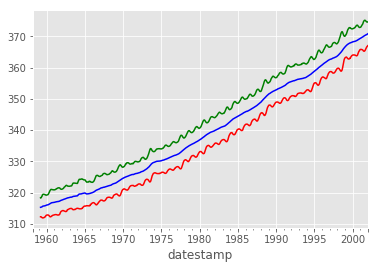

In [4]:
plt.style.use('ggplot')
#Hacemos la media con una ventana de tamaño 52
ma = co2_serie.rolling(window = 52).mean()

#Calculamos la desviación estándar con una ventana de tamaño 52
mstd = co2_serie.rolling(window = 52).std()

#Obtenemos una nueva serie que será el límite superior
ma_upper = ma + 2*mstd

#Obtenemos el límite inferior
ma_lower = ma - 2*mstd

#Nos creamos el plot
ma.plot(color = 'blue')
ma_upper.plot(color = 'green')
ma_lower.plot(color = 'red')
plt.show()

# Display aggregated values

En determinadas situaciones es posible que queramos mostrar nuestros datos de forma agregada. Por ejemplo, quizás nos interese conocer los niveles de CO2 a nivel de mes, en lugar de por día de la semana.

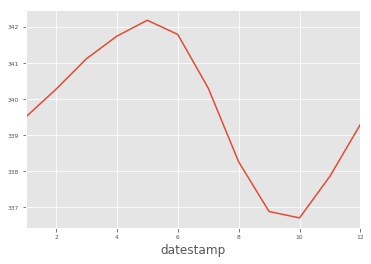

In [5]:
#Obtenemos los meses
index_month = co2_serie.index.month

#Hacemos la agregación por mes
co2_serie_monthly = co2_serie.groupby(index_month).mean()

#Mostramos el resultado
co2_serie_monthly.plot(fontsize = 6)

#Vemos el resultado 
plt.show()

Este gráfico nos muestra de forma más clara que la cantidad de CO2, alcanza sus picos entre mayo y junio.

# Compute numerical summaries

Una vez hemos representado nuestra serie de múltiples formas, es necesario obtener valores estadísticos que nos permitan tener más información de nuestra serie. Python dispone de métodos como **describe()**, **min()** o **max()** entre otros que nos permiten obtener una descripción estadística de nuestra serie.

In [6]:
#Hacemos un describe de nuestra serie
print(co2_serie.describe())

count    2284.000000
mean      339.657750
std        17.100899
min       313.000000
25%       323.975000
50%       337.700000
75%       354.500000
max       373.900000
Name: co2, dtype: float64


In [7]:
#Calculamos el mínimo y el máximo de la serie
print(co2_serie.min())
print(co2_serie.max())

313.0
373.9


# Boxplots and Histograms

Los Boxplots o gráficos de cajas se tratan de gráficos que nos permiten visualizar de una forma rápida y sencilla la distribución de nuestros datos mediante estadísticos.

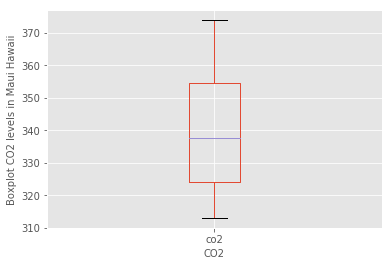

In [8]:
#Nos creamos nuestro primer boxplot
ax = pd.DataFrame(co2_serie).boxplot()
ax.set_xlabel('CO2', fontsize = 10)
ax.set_ylabel('Boxplot CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize = 10)
plt.show()

Los histogramas son gráficos que nos permiten visualizar la distribución de nuestros datos de una forma más fácil de entender para una persona no experta.

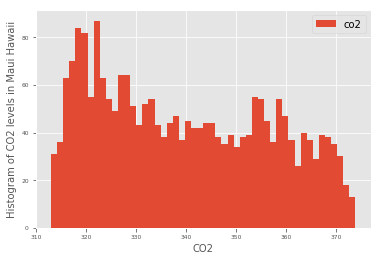

In [9]:
#Nos creamos nuestro histograma
ax = co2_serie.plot(kind = 'hist', bins = 50, fontsize = 6)

ax.set_xlabel('CO2', fontsize = 10)
ax.set_ylabel('Histogram of CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize = 10)
plt.show()

# Density plots

Los gráficos de densidad, se tratan de una versión suavizada de los histogramas.

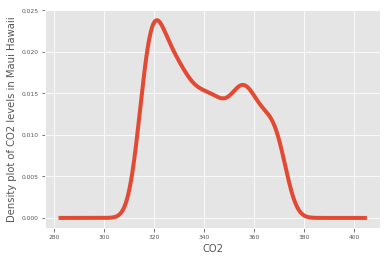

In [10]:
#Nos montamos el gráfico 
ax = co2_serie.plot(kind = 'density', linewidth = 4, fontsize = 6)

ax.set_xlabel('CO2', fontsize = 10)
ax.set_ylabel('Density plot of CO2 levels in Maui Hawaii', fontsize = 10)

#Vemos el resultado 
plt.show()